In [ ]:
import sklearn
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.DataFrame(pd.read_csv('/content/mission_launches.csv'))

Возьмем датасет с информацией о космических программах со всего мира.

In [ ]:
data.drop(labels = ['Unnamed: 0.1', 'Unnamed: 0'], inplace = True, axis= 1)
data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
data.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

Немного преобразуем числовой признак, чтобы конвертировать в Float:

In [ ]:
for i, dat in enumerate(data['Price']):
  if type(dat) == str:
    if dat.find(',')>=0:
      dat = dat.replace(',', '')
      data['Price'][i] = dat

Для каждой космической компании считаем среднее значение стоимости космической программы:

In [ ]:
nan_arr = []
for org in data['Organisation'].unique():
  nan_arr.append([org, data[data['Organisation'] == org]['Price'].dropna().astype('float').mean()])

In [ ]:
Заменяем пропущенные значения на среднюю стоимость космических программ соответствующих компаний:

In [ ]:
for i, price in enumerate(data['Price']):
  if pd.isnull(price):
    for j in nan_arr:
      if j[0] == data['Organisation'][i]:
        price = j[1]
        break
    data['Price'][i] = price

Пропущенных значений хоть и стало намного меньше, но все еще остались. Видимо для некоторых компаний вообще нет информации о стоимости. Тогда просто удалим такие строчки.

In [ ]:
data.isnull().sum()

Organisation        0
Location            0
Date                0
Detail              0
Rocket_Status       0
Price             458
Mission_Status      0
dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['Mission_Status'].unique()

array(['Success', 'Failure', 'Partial Failure', 'Prelaunch Failure'],
      dtype=object)

In [ ]:
le = LabelEncoder()
data['Mission_Status'] = le.fit_transform(data['Mission_Status'])

In [ ]:
data['Mission_Status'].unique()

array([3, 0, 1, 2])

In [ ]:
import scipy.stats as stats
from sklearn.datasets import load_diabetes

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [ ]:
df = load_diabetes(as_frame=True, scaled=False)

In [ ]:
data = df['data']
target = df['target']

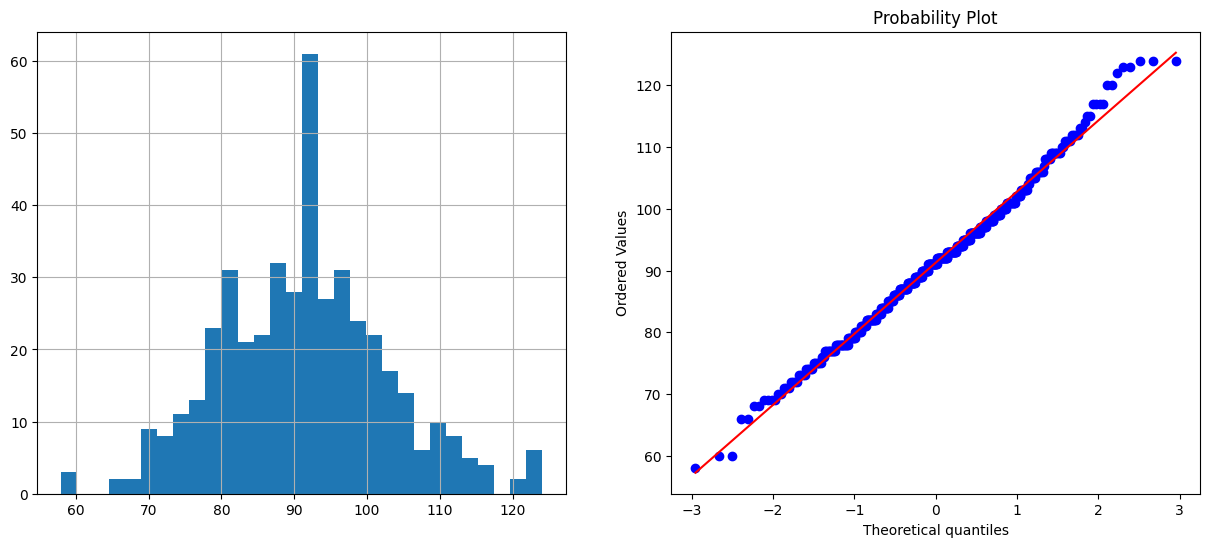

In [ ]:
diagnostic_plots(data, 's6')

Оптимальное значение λ = 0.5104884693621882


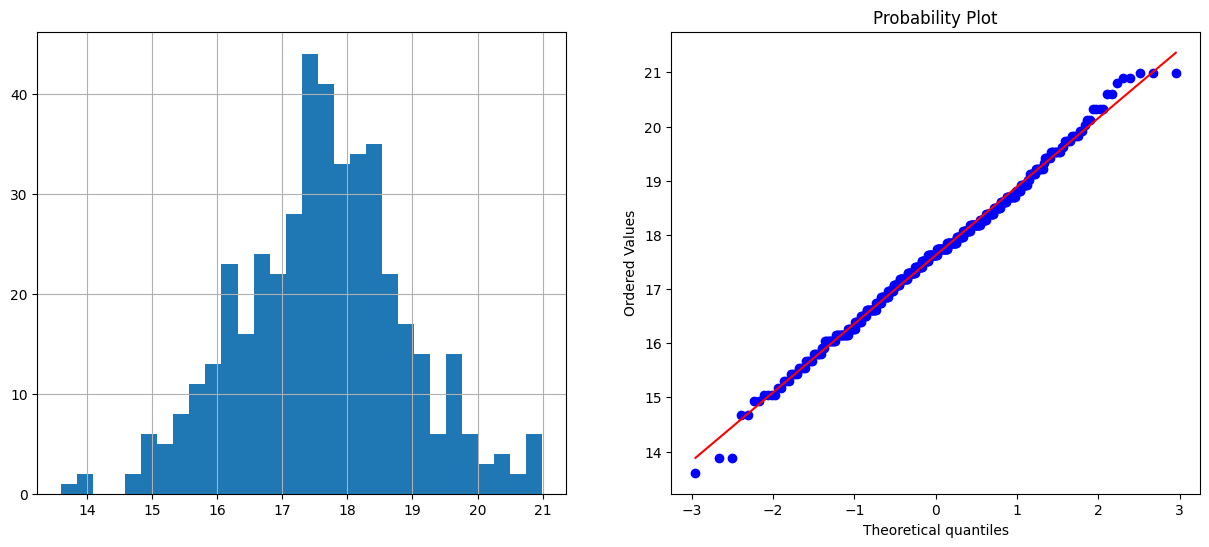

In [ ]:
data['s6_boxcox'], param = stats.boxcox(data['s6']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 's6_boxcox')